In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pandas as pd
import plotly.express as px
import plotly.io as pio
import IPython

In [5]:
dir = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_order_parameters-2025-5-5-19:38:49.pickle"
#dir = "/home/karner/Documents/github/MagneticParticles/rigid_magnetic/results/MAG2P_order_parameters-2025-5-5-19:38:49.pickle"


dg = pd.read_pickle(dir)
dg = dg.fillna(0)
df = dg.iloc[:,:-24]
#df = dg.iloc[:,:-50]

'''
df["deg_0"] = np.log1p(dg[0.0])
df["deg_7"] = np.log1p(dg[0.12566370614359174])
df["deg_60"] = np.log1p(dg[1.0053096491487339])
df["deg_90"] = np.log1p(dg[1.5079644737231008])
'''
df.describe()

/tmp/ipykernel_17243/2637802073.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dg = dg.fillna(0)


,lambda,shift,mean_bonds,std_bonds,mean_second_neighbours,std_second_neighbours,mean_size,std_size,largest,mean_radius_of_gyration,...,2.010619,2.136283,2.261947,2.38761,2.513274,2.638938,2.764602,2.890265,3.015929,3.141593
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,...,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.0
mean,14.951466,0.349861,1.482201,0.607201,0.959342,0.297412,6.379589,3.740624,20.782356,2.141318,...,0.443291,0.281620,0.139599,0.095339,0.079700,0.096671,0.164025,0.342100,0.576480,0.0
std,21.946442,0.216066,0.773294,0.243653,0.532607,0.274133,3.194507,2.372857,11.667600,2.261890,...,0.623865,0.439882,0.271546,0.250665,0.214457,0.247482,0.404962,0.782313,1.574470,0.0
min,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,0.150000,0.949000,0.446636,1.000000,0.000000,3.083229,1.552977,11.000000,0.415056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5.000000,0.350000,1.754000,0.613402,1.085714,0.287480,6.595243,4.014197,22.000000,1.124787,...,0.077500,0.037099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,17.000000,0.550000,1.920000,0.747213,1.272513,0.492440,8.873874,5.506423,29.000000,3.484203,...,0.789439,0.453827,0.190809,0.102101,0.062053,0.050621,0.047830,0.057602,0.022370,0.0
max,100.000000,0.700000,2.908000,1.184160,2.147895,1.129984,14.676471,11.390761,59.000000,21.294041,...,7.957747,3.978874,3.978874,3.978874,3.978874,3.978874,7.957747,7.957747,7.821911,0.0


In [6]:

def auto_set_plotly_renderer():
    try:
        shell = IPython.get_ipython().__class__.__name__
        if "ZMQInteractiveShell" in shell:
            # Likely Jupyter Notebook or JupyterLab
            pio.renderers.default = "notebook_connected"
        else:
            # Fallback for scripts or non-notebook shells
            pio.renderers.default = "browser"
    except Exception:
        pio.renderers.default = "browser"  # absolute fallback

auto_set_plotly_renderer()


In [7]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# Prepare data
X = df.iloc[:, 3:].values
X = StandardScaler().fit_transform(X)
labels = "s_" + df["shift"].astype(str) + "_" + df["lambda"].astype(str)

# Compute t-SNE
tsne_embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20, n_jobs=7).fit_transform(X)

# Build a DataFrame for Plotly
plot_df = pd.DataFrame({
    "TSNE-1": tsne_embedding[:, 0],
    "TSNE-2": tsne_embedding[:, 1],
    "Label": labels,
    "Shift": df["shift"],
    "Lambda": df["lambda"]
})

# Plot with hover using Shift as coloring 
fig = px.scatter(
    plot_df,
    x="TSNE-1",
    y="TSNE-2",
    color="Shift",  # can be removed if too many categories
    hover_data=["Shift", "Lambda"],
    color_continuous_scale="Turbo",  # any sequential scale
    title="t-SNE Embedding with Hover Labels",
    width=900,
    height=700
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("tsne_shift.html", auto_open=True)


# Plot with hover using Lambda as coloring 
fig = px.scatter(
    plot_df,
    x="TSNE-1",
    y="TSNE-2",
    color="Lambda",  # can be removed if too many categories
    hover_data=["Shift", "Lambda"],
    color_continuous_scale="Turbo",  # any sequential scale
    title="t-SNE Embedding with Hover Labels",
    width=900,
    height=700
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("tsne_lambda.html", auto_open=True)


In [8]:
from sklearn.decomposition import PCA

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.23267221 0.18151954]


In [9]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import IPython

# Prepare data for plotly
biplot_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
biplot_df["Label"] = labels
biplot_df["Shift"] = df["shift"].values
biplot_df["Lambda"] = df["lambda"].values

fig = px.scatter(
    biplot_df,
    x="PC1", y="PC2",
    color="Shift",  # or "Shift"
    hover_data=["Shift", "Label"],
    color_continuous_scale="Turbo",  # any sequential scale
    title="PCA Biplot (Interactive)",
    width=900,
    height=700
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("pca_2d_shift.html", auto_open=True)


fig = px.scatter(
    biplot_df,
    x="PC1", y="PC2",
    color="Lambda",  # or "Shift"
    hover_data=["Shift", "Label"],
    color_continuous_scale="Turbo",  # any sequential scale
    title="PCA Biplot (Interactive)",
    width=900,
    height=700
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("pca_2d_lambda.html", auto_open=True)

Index([             'mean_bonds',               'std_bonds',
        'mean_second_neighbours',   'std_second_neighbours',
                     'mean_size',                'std_size',
                       'largest', 'mean_radius_of_gyration',
        'std_radius_of_gyration',                       0.0,
             0.12566370614359174,       0.25132741228718347,
              0.3769911184307752,        0.5026548245743669,
              0.6283185307179586,        0.7539822368615504,
              0.8796459430051422,        1.0053096491487339,
              1.1309733552923256,        1.2566370614359172,
              1.3823007675795091,        1.5079644737231008,
              1.6336281798666925,        1.7592918860102844,
               1.884955592153876,        2.0106192982974678,
              2.1362830044410597,         2.261946710584651,
               2.387610416728243,        2.5132741228718345,
              2.6389378290154264,        2.7646015351590183,
              2.89026524

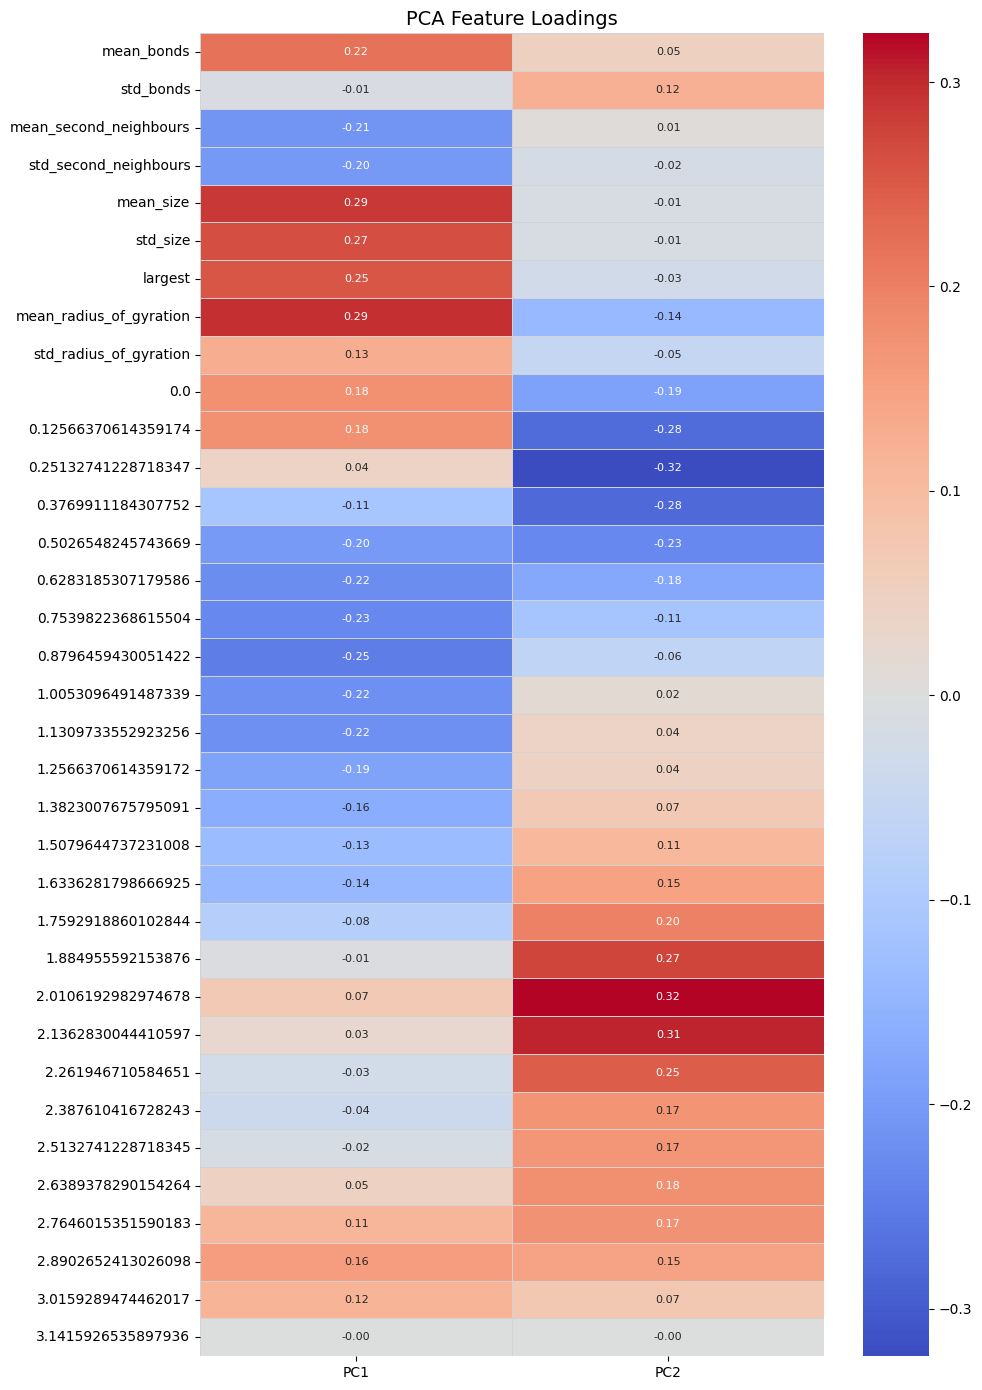

<Figure size 640x480 with 0 Axes>

In [10]:
# Create a DataFrame of loadings
feature_names = df.columns[3:]
print(feature_names, len(feature_names), len(pca.components_.T))

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=feature_names
)

# Display loadings sorted by absolute value in PC1
loadings.sort_values("PC1", key=abs, ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

# Set dynamic figure height based on number of features
n_features = len(loadings)
fig_height = max(6, n_features * 0.4)  # ensures readability for many features

plt.figure(figsize=(10, fig_height))
sns.heatmap(loadings, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            annot_kws={"size": 8}, linewidths=0.5, linecolor='lightgray')

plt.title("PCA Feature Loadings", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()
plt.savefig("loadings.png",dpi=400)

In [11]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create DataFrame for Plotly
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
pca_df["Label"] = labels  # your custom label strings
pca_df["Shift"] = df["shift"]
pca_df["Lambda"] = df["lambda"]

# Plot 3D interactive scatter
fig = px.scatter_3d(
    pca_df,
    x="PC1", y="PC2", z="PC3",
    color="Shift",  # or "Shift"
    hover_data=["Shift", "Label"],
    color_continuous_scale="Turbo",  # any sequential scale
    title="3D PCA Colored by Lambda",
    width=900,
    height=750
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.write_html("pca_shift.html", auto_open=True)
fig.show()

Index([             'mean_bonds',               'std_bonds',
        'mean_second_neighbours',   'std_second_neighbours',
                     'mean_size',                'std_size',
                       'largest', 'mean_radius_of_gyration',
        'std_radius_of_gyration',                       0.0,
             0.12566370614359174,       0.25132741228718347,
              0.3769911184307752,        0.5026548245743669,
              0.6283185307179586,        0.7539822368615504,
              0.8796459430051422,        1.0053096491487339,
              1.1309733552923256,        1.2566370614359172,
              1.3823007675795091,        1.5079644737231008,
              1.6336281798666925,        1.7592918860102844,
               1.884955592153876,        2.0106192982974678,
              2.1362830044410597,         2.261946710584651,
               2.387610416728243,        2.5132741228718345,
              2.6389378290154264,        2.7646015351590183,
              2.89026524

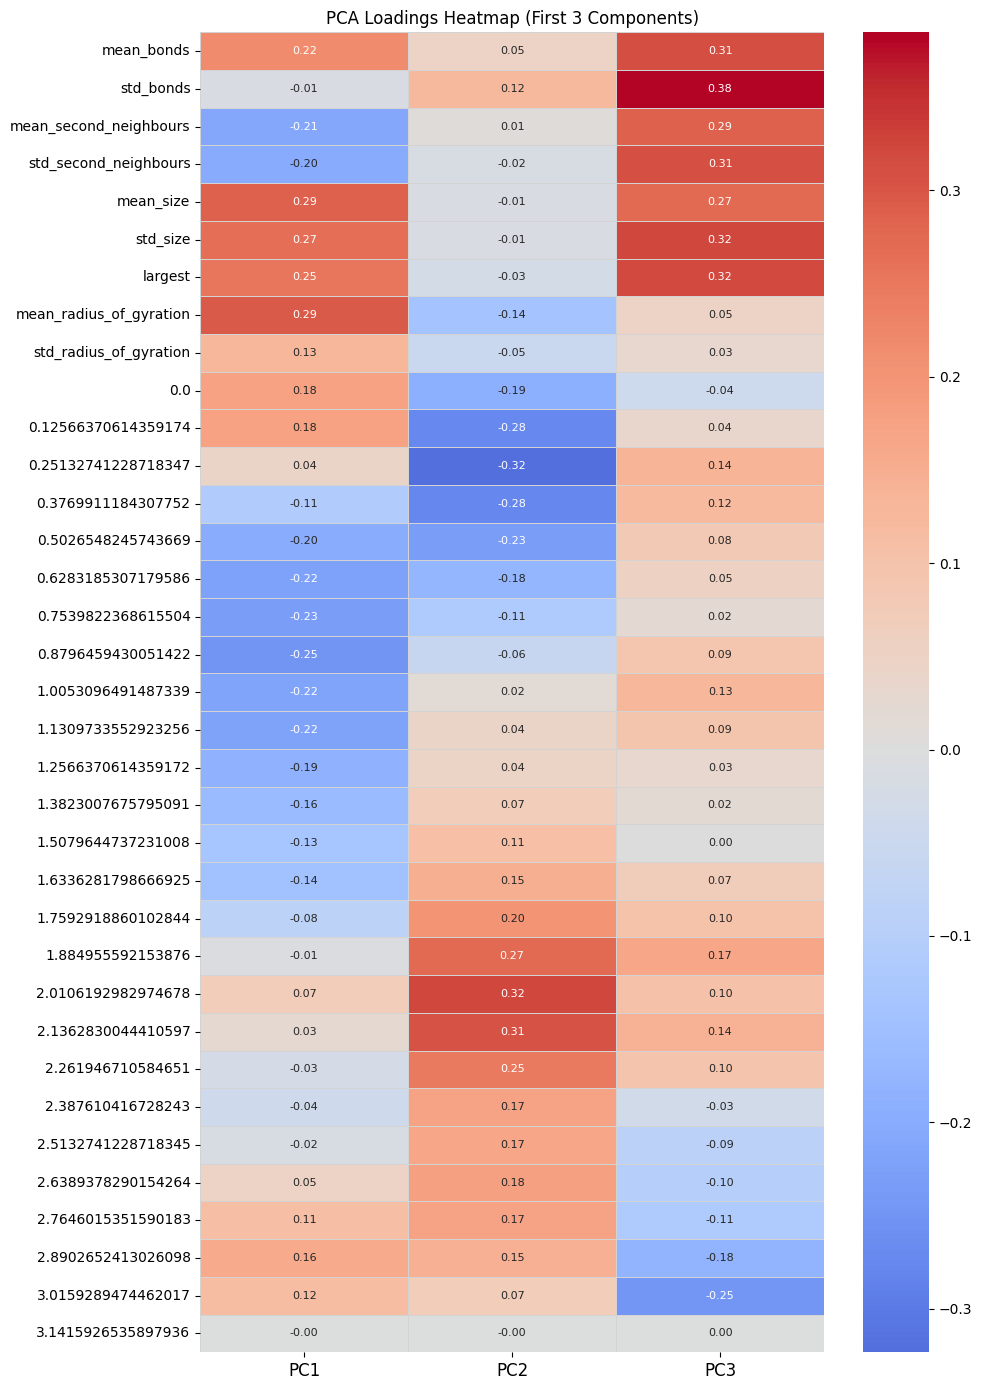

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

feature_names = df.columns[3:]
print(feature_names, len(feature_names), len(pca.components_.T))

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2", "PC3"],
    index=feature_names
)

# Plot heatmap
plt.figure(figsize=(10, max(6, len(loadings)*0.4)))  # auto-scale height
sns.heatmap(loadings, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            annot_kws={"size": 8}, linewidths=0.5, linecolor='lightgray')

plt.title("PCA Loadings Heatmap (First 3 Components)")
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

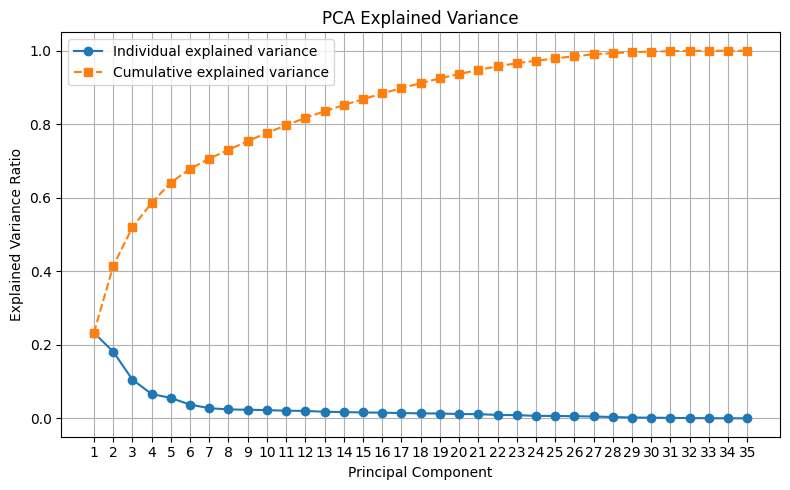

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(X)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
n_components = len(explained_var)

plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), explained_var, marker='o', label='Individual explained variance')
plt.plot(range(1, n_components + 1), cumulative_var, marker='s', linestyle='--', label='Cumulative explained variance')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.xticks(range(1, n_components + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import hdbscan
from sklearn.manifold import TSNE
import plotly.express as px

# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import hdbscan
from sklearn.manifold import TSNE
import plotly.express as px

# Main analysis function
def run_umap_and_hdclustering(X, shift, lambdas, labels=None):
    # UMAP embedding
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embedding = reducer.fit_transform(X)

    # Plot UMAP with shift
    fig1 = px.scatter(
        x=umap_embedding[:, 0],
        y=umap_embedding[:, 1],
        color=shift,
        hover_name=labels,
        labels={"x": "UMAP-1", "y": "UMAP-2"},
        title="UMAP colored by shift"
    )
    fig1.show()

    # Plot UMAP with lambda
    fig2 = px.scatter(
        x=umap_embedding[:, 0],
        y=umap_embedding[:, 1],
        color=lambdas,
        hover_name=labels,
        labels={"x": "UMAP-1", "y": "UMAP-2"},
        title="UMAP colored by lambda"
    )
    fig2.show()

    # HDBSCAN clustering
    clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
    cluster_labels = clusterer.fit_predict(X)

    # t-SNE embedding with cluster labels
    tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='random', random_state=42)
    tsne_embedding = tsne.fit_transform(X)

    tsne_df = pd.DataFrame({
        "TSNE-1": tsne_embedding[:, 0],
        "TSNE-2": tsne_embedding[:, 1],
        "Cluster": cluster_labels.astype(str)
    })
    if labels is not None:
        tsne_df["Label"] = labels

    fig3 = px.scatter(
        tsne_df,
        x="TSNE-1",
        y="TSNE-2",
        color="Cluster",
        hover_name="Label" if labels is not None else None,
        title="t-SNE colored by HDBSCAN clusters"
    )
    fig3.show()

    return umap_embedding, cluster_labels, tsne_embedding


Lambda = df["lambda"]
Shift = df["shift"]

hover_labels = ["λ=" + str(l) + ", shift=" + str(s) for l, s in zip(Lambda, Shift)]

run_umap_and_hdclustering(X, Lambda, Shift, hover_labels)

/home/carina/.local/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



(array([[-3.2866247 , -4.866574  ],
        [17.041807  , -3.129781  ],
        [14.881291  , -3.0506065 ],
        ...,
        [ 5.151116  , -1.4697568 ],
        [-0.61912644, -2.4915626 ],
        [ 4.392894  , 11.533681  ]], dtype=float32),
 array([ 1,  3,  2, ..., -1,  4, -1]),
 array([[-50.615498 ,  -7.1062574],
        [  0.7959485,  47.81226  ],
        [ -1.6672403,  34.061295 ],
        ...,
        [ 18.955544 ,  25.292166 ],
        [-50.298393 , -28.79827  ],
        [ -4.7724185, -40.387245 ]], dtype=float32))

/home/carina/.local/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



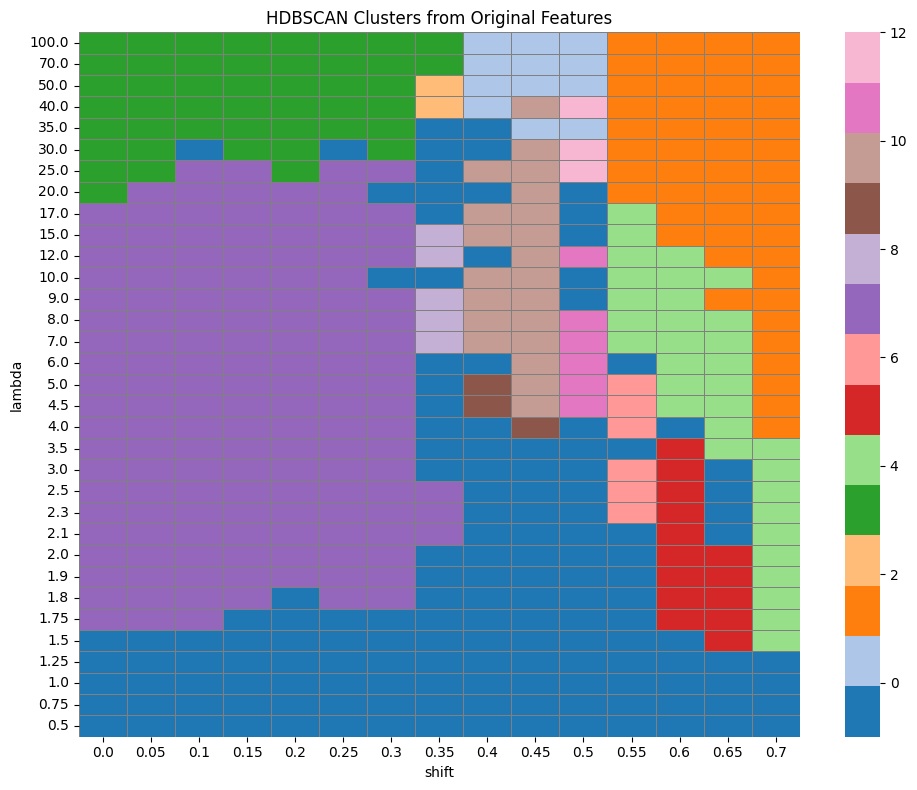

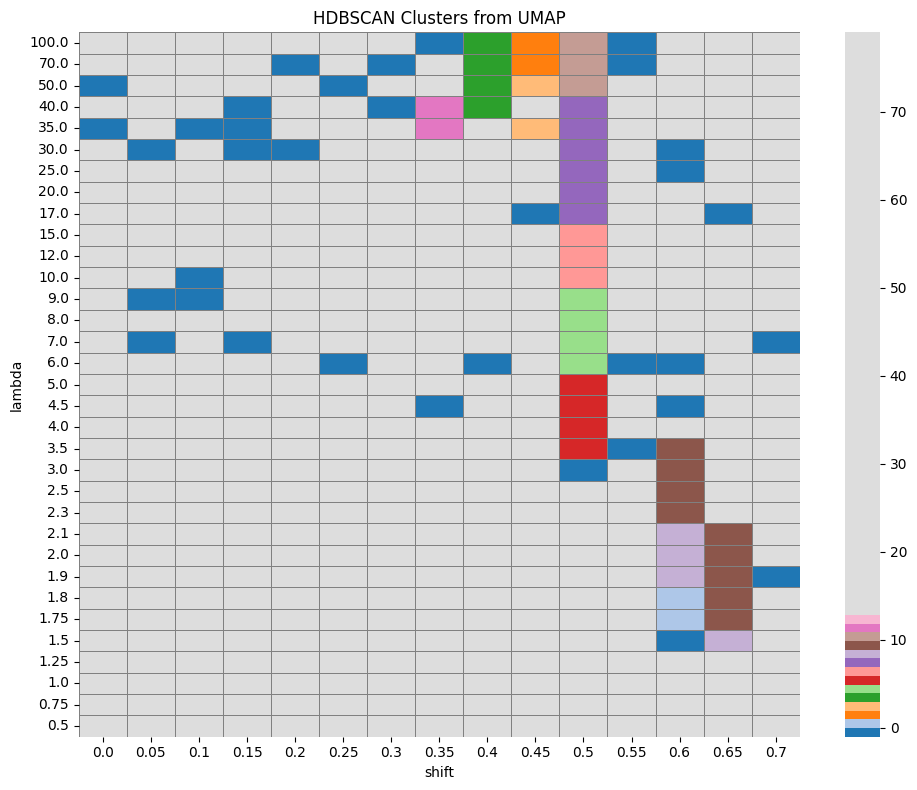

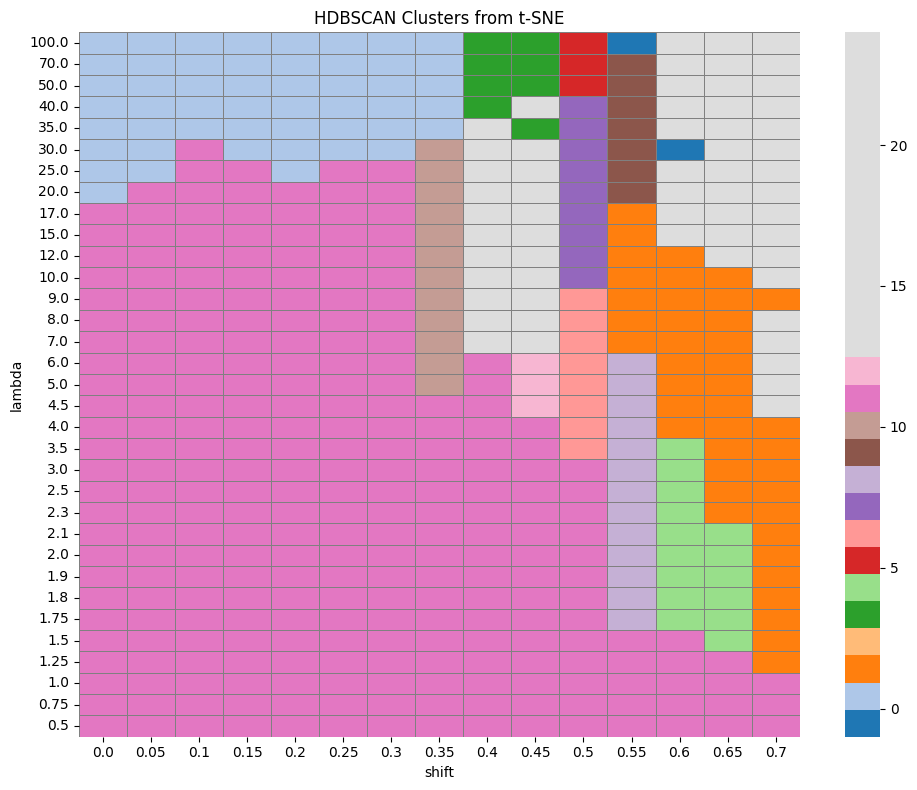

In [28]:
import numpy as np
import pandas as pd
import umap
import hdbscan
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


def run_umap_tsne_heatmap(X, lambdas, shifts, cluster_min_size=10):
    """
    Perform UMAP and t-SNE on data X, assign clusters with HDBSCAN,
    and create heatmaps over (shift, lambda) space colored by cluster assignment.
    Also plots original UMAP and t-SNE embeddings for reference with hover-over labels.
    """
    # Run HDBSCAN clustering (parallelized)
    clusterer = hdbscan.HDBSCAN(min_cluster_size=cluster_min_size, core_dist_n_jobs=-1)
    cluster_labels = clusterer.fit_predict(X)

    # UMAP embedding (parallelized)
    umap_emb = umap.UMAP(n_components=2, random_state=42, n_jobs=-1).fit_transform(X)

    # t-SNE embedding (parallelized)
    tsne_emb = TSNE(n_components=2, perplexity=30, init='random', random_state=42, n_jobs=-1).fit_transform(X)

    # Build a DataFrame for lambda, shift, and cluster label
    df_cluster = pd.DataFrame({
        'lambda': lambdas,
        'shift': shifts,
        'cluster': cluster_labels
    })

    # Add embeddings for Plotly
    df_cluster['UMAP-1'] = umap_emb[:, 0]
    df_cluster['UMAP-2'] = umap_emb[:, 1]
    df_cluster['tSNE-1'] = tsne_emb[:, 0]
    df_cluster['tSNE-2'] = tsne_emb[:, 1]

    # Define consistent color map for all clusters
    unique_clusters = sorted(df_cluster['cluster'].unique())
    cluster_palette = sns.color_palette("tab20", n_colors=len(unique_clusters)).as_hex()
    cluster_color_map = {cl: cluster_palette[i % len(cluster_palette)] for i, cl in enumerate(unique_clusters)}
    df_cluster['cluster_color'] = df_cluster['cluster'].map(cluster_color_map)

    # Plot original UMAP with Plotly
    fig_umap = px.scatter(
        df_cluster, x="UMAP-1", y="UMAP-2", color=df_cluster['cluster'].astype(str),
        hover_data={"lambda": True, "shift": True},
        title="UMAP projection with HDBSCAN clusters",
        color_discrete_map={str(k): v for k, v in cluster_color_map.items()}
    )
    fig_umap.show()

    # Plot original t-SNE with Plotly
    fig_tsne = px.scatter(
        df_cluster, x="tSNE-1", y="tSNE-2", color=df_cluster['cluster'].astype(str),
        hover_data={"lambda": True, "shift": True},
        title="t-SNE projection with HDBSCAN clusters",
        color_discrete_map={str(k): v for k, v in cluster_color_map.items()}
    )
    fig_tsne.show()

    # Function to plot a heatmap
    def plot_cluster_heatmap(df, column, title):
        heatmap_data = df.groupby(['lambda', 'shift'])[column] \\
                        .agg(lambda x: x.value_counts().idxmax()) \\
                        .unstack().sort_index(ascending=False)

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            heatmap_data,
            cmap='tab20',  # automatic categorical colormap
            annot=False,
            cbar=True,
            linewidths=0.5,
            linecolor='gray'
        )
        plt.title(title)
        plt.xlabel("shift")
        plt.ylabel("lambda")
        plt.tight_layout()
        plt.show()

    # Plot the heatmap for raw X clustering
    plot_cluster_heatmap(df_cluster, 'cluster', "HDBSCAN Clusters from Original Features")

    # Add and plot for UMAP and t-SNE spaces
    df_cluster['cluster_umap'] = hdbscan.HDBSCAN(min_cluster_size=cluster_min_size, core_dist_n_jobs=-1).fit_predict(umap_emb)
    df_cluster['cluster_tsne'] = hdbscan.HDBSCAN(min_cluster_size=cluster_min_size, core_dist_n_jobs=-1).fit_predict(tsne_emb)

    plot_cluster_heatmap(df_cluster, 'cluster_umap', "HDBSCAN Clusters from UMAP")
    plot_cluster_heatmap(df_cluster, 'cluster_tsne', "HDBSCAN Clusters from t-SNE")

    return umap_emb, tsne_emb, cluster_labels, df_cluster


umap_emb, tsne_emb, cluster_labels, df_cluster = run_umap_tsne_heatmap(X, Lambda, Shift, cluster_min_size=10)

In [14]:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Feature matrix and labels
feature_names = df.columns[3:]
y = labels  # already defined
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

#Define the model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Accuracy scores
scores = cross_val_score(clf, X, y_encoded, cv=cv)
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy: {:.3f}".format(np.mean(scores)))

# Cross-validated predictions
y_pred = cross_val_predict(clf, X, y_encoded, cv=cv)

# Classification report
print(classification_report(y_encoded, y_pred, target_names=class_names))

# Confusion matrix plot
ConfusionMatrixDisplay.from_predictions(y_encoded, y_pred, display_labels=class_names)
plt.title("Confusion Matrix (Cross-Validated Predictions)")
plt.show()

# Fit on full data (only for visualization)
clf_visual = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_visual.fit(X, y_encoded)

plt.figure(figsize=(16, 10))
plot_tree(clf_visual, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree (Visualization Only)")
plt.tight_layout()
plt.show()
'''

'\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.tree import DecisionTreeClassifier, plot_tree\nfrom sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold\nfrom sklearn.metrics import classification_report, ConfusionMatrixDisplay\nfrom sklearn.preprocessing import LabelEncoder\n\n# Feature matrix and labels\nfeature_names = df.columns[3:]\ny = labels  # already defined\nle = LabelEncoder()\ny_encoded = le.fit_transform(y)\nclass_names = le.classes_\n\n#Define the model\nclf = DecisionTreeClassifier(max_depth=4, random_state=42)\n\n# Cross-validation setup\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\n# Accuracy scores\nscores = cross_val_score(clf, X, y_encoded, cv=cv)\nprint("Cross-validation accuracy scores:", scores)\nprint("Mean accuracy: {:.3f}".format(np.mean(scores)))\n\n# Cross-validated predictions\ny_pred = cross_val_predict(clf, X, y_encoded, cv=cv)\n\n# Classification report\nprint(c